In [ ]:
!pip install -qU accelerate transformers bitsandbytes peft datasets sentencepiece tqdm huggingface evaluate bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from huggingface_hub import login
login()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Llama3-genre-classifier - Evaluation

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_name = "akshayparam/llama3-genre-classifier"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
model.eval().cuda()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/335 [00:00<?, ?B/s]

adapter_config.json:   0%|          | 0.00/779 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/826 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/27.3M [00:00<?, ?B/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): lora.Linear(
            (base_layer): Linear(in_features=4096, out_features=4096, bias=False)
            (lora_dropout): ModuleDict(
              (default): Dropout(p=0.05, inplace=False)
            )
            (lora_A): ModuleDict(
              (default): Linear(in_features=4096, out_features=16, bias=False)
            )
            (lora_B): ModuleDict(
              (default): Linear(in_features=16, out_features=4096, bias=False)
            )
            (lora_embedding_A): ParameterDict()
            (lora_embedding_B): ParameterDict()
            (lora_magnitude_vector): ModuleDict()
          )
          (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (v_proj): lora.Linear(
            (base_layer): Linear(in_features=4096, out_features=1024

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/NLP/Datasets/lyrics_song_info.csv")
df = df.dropna(subset=["lyrics", "tags"])

lyrics = df["lyrics"].tolist()[:10000]
genres = df["tags"].tolist()[:10000]


In [ ]:
from tqdm import tqdm
import transformers
transformers.logging.set_verbosity_error()
import warnings
warnings.filterwarnings("ignore")

predictions = []
references = []

for i in tqdm(range(len(lyrics)), desc="Generating genres"):
    input_text = lyrics[i][:300]
    reference_genre = genres[i]

    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=512).to("cuda")

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=20,
            do_sample=False
        )

    prediction = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()
    predictions.append(prediction)
    references.append(reference_genre)


Generating genres: 100%|██████████| 10000/10000 [2:41:59<00:00,  1.03it/s]


In [ ]:
from bert_score import score
P, R, F1 = score(predictions, references, lang="en", verbose=True)
print(f"Avg BERTScore F1: {F1.mean().item():.4f}")


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

calculating scores...
computing bert embedding.


  0%|          | 0/184 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/157 [00:00<?, ?it/s]

done in 59.20 seconds, 168.93 sentences/sec
Avg BERTScore F1: 0.7715


In [ ]:
print(f"Average Precision: {P.mean().item():.4f}")
print(f"Average Recall: {R.mean().item():.4f}")
print(f"Average F1: {F1.mean().item():.4f}")


Average Precision: 0.7436
Average Recall: 0.8026
Average F1: 0.7715


In [ ]:
import torch

print(f"Std Dev Precision: {torch.std(P).item():.4f}")
print(f"Std Dev Recall: {torch.std(R).item():.4f}")
print(f"Std Dev F1: {torch.std(F1).item():.4f}")


Std Dev Precision: 0.0160
Std Dev Recall: 0.0301
Std Dev F1: 0.0140


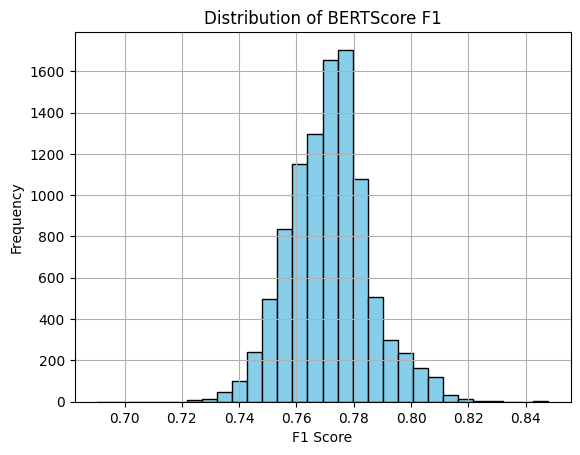

In [ ]:
import matplotlib.pyplot as plt

plt.hist(F1.cpu().numpy(), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of BERTScore F1")
plt.xlabel("F1 Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


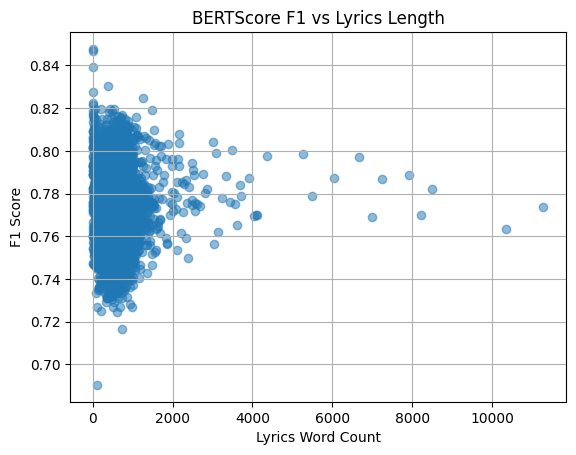

In [ ]:
lyrics_lengths = [len(x.split()) for x in lyrics]

plt.scatter(lyrics_lengths, F1.cpu().numpy(), alpha=0.5)
plt.title("BERTScore F1 vs Lyrics Length")
plt.xlabel("Lyrics Word Count")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()


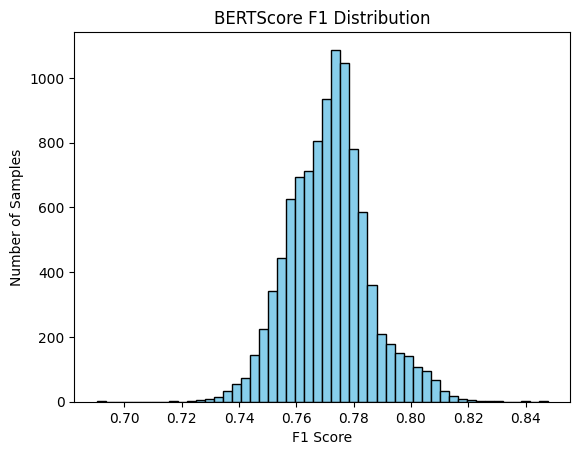

In [ ]:
import matplotlib.pyplot as plt

plt.hist(F1.cpu().numpy(), bins=50, color='skyblue', edgecolor='black')
plt.title("BERTScore F1 Distribution")
plt.xlabel("F1 Score")
plt.ylabel("Number of Samples")
plt.show()


In [ ]:
import pandas as pd
scores_df = pd.DataFrame({
    "Lyrics": lyrics,
    "Reference": references,
    "Prediction": predictions,
    "BERTScore_F1": F1.cpu().numpy()
})
D
print(scores_df.sort_values("BERTScore_F1").head(10))


                                                 Lyrics  \
2656  \n\n[Chorus: 👔💵 ]\n👁️🤗, 📈 ⌛\n👁️🤗, 📈 ⌛\n🤔😰\n👁️🤗...   
3161  \n\n[Intro: Oumou Sangaré]\nAa! dennin! k'an b...   
6799  \n\n[Intro: Travis Scott]\nDon't know no Engli...   
2802  \n\n[Intro]\nAyy!\nKodak bop on my cock, Kodak...   
4201  \n\n[Produced by Ben Billions]\n\n[Intro: Nükh...   
2070  \n\n[Chorus]\nBring 'em dead or alive (WHOA!)\...   
8957  \n\n[Chorus]\nYeah, ain't really mean to hurt ...   
3801  \n\n[Spoken: Logic]\nTi yojne dna pu kcuf eht ...   
6869  \n\n[Intro: Quavo]\nYeah, yeah, yeah, yeah, ye...   
4285  \n\n[Intro: Mustafa The Poet]\nOoo, oo, oo, oo...   

                                         Reference  \
2656                                       Rap;R&B   
3161                        R&B;Soundtrack;Pop;Rap   
6799                                           Rap   
2802                                      Trap;Rap   
4201     Singer-Songwriter;Canada;Pop;R&B;Producer   
2070                      

RoBERTa-LSTMGRU-genre-classifier Evaluation with 10 genres

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import pandas as pd
from tqdm import tqdm
from bert_score import score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
model_name = "akshayparam/RoBERTa_LGb-lyrics-genre-classifier"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval().cuda()

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP/Datasets/lyrics_song_info.csv")
df = df.dropna(subset=["lyrics", "tags"])

lyrics = df["lyrics"].tolist()[:10000]
genres = df["tags"].tolist()[:10000]

In [ ]:
predictions, references = [], []

for i in tqdm(range(len(lyrics)), desc="Evaluating RoBERTa"):
    input_text = lyrics[i][:512]
    reference_genre = genres[i]

    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=512, padding=True).to("cuda")

    with torch.no_grad():
        outputs = model(**inputs)
        pred_id = torch.argmax(outputs.logits, dim=1).item()
        prediction = model.config.id2label[pred_id] if hasattr(model.config, "id2label") else str(pred_id)

    predictions.append(prediction)
    references.append(reference_genre)

Evaluating RoBERTa: 100%|██████████| 10000/10000 [01:33<00:00, 107.38it/s]


In [ ]:
P, R, F1 = score(predictions, references, lang="en", verbose=True)
print(f"Avg BERTScore F1: {F1.mean().item():.4f}")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/29 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/157 [00:00<?, ?it/s]

done in 4.18 seconds, 2391.22 sentences/sec
Avg BERTScore F1: 0.9119


In [ ]:
print(f"Average Precision: {P.mean().item():.4f}")
print(f"Average Recall: {R.mean().item():.4f}")
print(f"Average F1: {F1.mean().item():.4f}")

Average Precision: 0.9349
Average Recall: 0.8927
Average F1: 0.9119


In [ ]:
import torch

print(f"Std Dev Precision: {torch.std(P).item():.4f}")
print(f"Std Dev Recall: {torch.std(R).item():.4f}")
print(f"Std Dev F1: {torch.std(F1).item():.4f}")

Std Dev Precision: 0.0718
Std Dev Recall: 0.1071
Std Dev F1: 0.0866


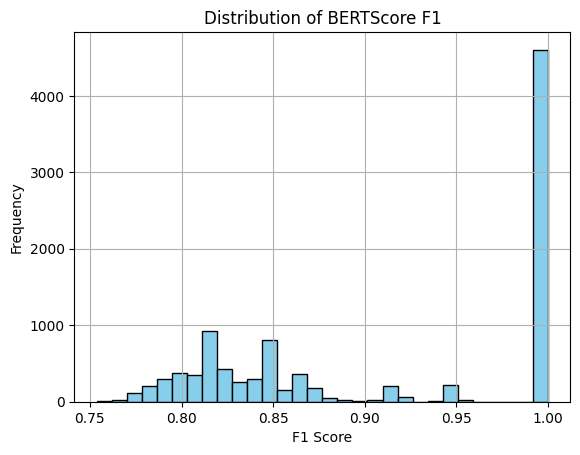

In [ ]:
plt.hist(F1.cpu().numpy(), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of BERTScore F1")
plt.xlabel("F1 Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

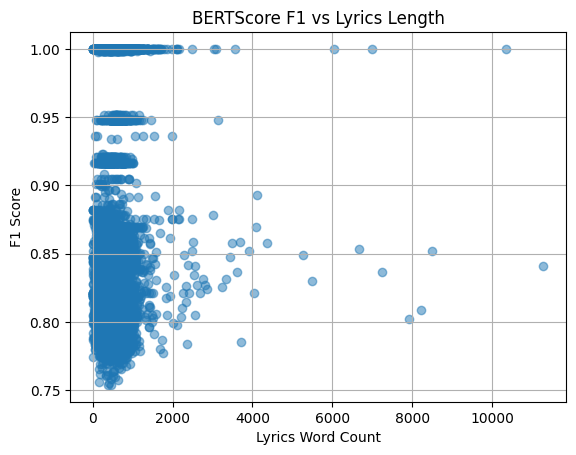

In [ ]:
lyrics_lengths = [len(l.split()) for l in lyrics]
plt.scatter(lyrics_lengths, F1.cpu().numpy(), alpha=0.5)
plt.title("BERTScore F1 vs Lyrics Length")
plt.xlabel("Lyrics Word Count")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()

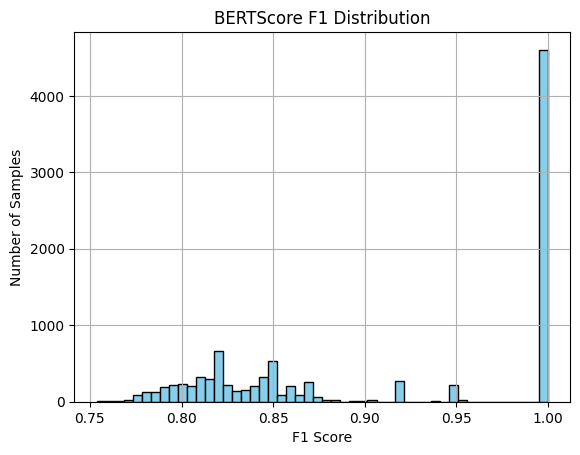

In [ ]:
plt.hist(F1.cpu().numpy(), bins=50, color='skyblue', edgecolor='black')
plt.title("BERTScore F1 Distribution")
plt.xlabel("F1 Score")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.show()

In [ ]:
results_df = pd.DataFrame({
    "Lyrics": lyrics,
    "Reference": references,
    "Prediction": predictions,
    "BERTScore_F1": F1.cpu().numpy()
})
print(results_df.sort_values("BERTScore_F1").head(10))

                                                 Lyrics  \
9997  \n\n[Verse 1]\nI ponder of something great\nMy...   
4051  \n\n[Intro: Big Sean]\nOh god!\nSean Don\nFall...   
9999  \n\n[Verse 1]\nWhen everyone you thought you k...   
2744  \n\n[Intro]\nVoices in your, voices in your, v...   
6675  \n\n[Intro: Camila Cabello & Travis Scott]\nYe...   
2882  \n\n[Intro: XXXTENTACION]\nSo what I mean is l...   
4203  \n\n[Intro: The Weeknd]\nYeah, uh\n\n[Verse 1:...   
4608  \n\n[Produced by: Tyler, The Creator]\n\n[Vers...   
9808  \n\n[Intro: Billie Eilish & Justin Bieber]\nHm...   
9232  \n\n[Intro]\nYeah, ayy\n\n[Chorus]\nI work har...   

                                              Reference  Prediction  \
9997  Rap Rock;Emo;Electronic Rock;Electro-Pop;Elect...        Rock   
4051  Pop-Punk;Pop-Rock;Punk Rock;Alternative Pop;Al...         R&B   
9999  Nu Disco;Alternative Dance;Indie Pop;Indie;Syn...        Rock   
2744  Nu-Metal;Rap Rock;Metal;Screamo;Alternative;Ha...        Roc

RoBERTa-LSTMGRU-genre-classifier Evaluation 2 with 100 genres

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch
import pandas as pd
from tqdm import tqdm
from bert_score import score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
model_name = "akshayparam/RoBERTa-LGb-lyrics-genre-classifier2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval().cuda()

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/5.23k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NLP/Datasets/lyrics_song_info.csv")
df = df.dropna(subset=["lyrics", "tags"])

lyrics = df["lyrics"].tolist()[:10000]
genres = df["tags"].tolist()[:10000]

In [ ]:
predictions, references = [], []

for i in tqdm(range(len(lyrics)), desc="Evaluating RoBERTa"):
    input_text = lyrics[i][:512]
    reference_genre = genres[i]

    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=512, padding=True).to("cuda")

    with torch.no_grad():
        outputs = model(**inputs)
        pred_id = torch.argmax(outputs.logits, dim=1).item()
        prediction = model.config.id2label[pred_id] if hasattr(model.config, "id2label") else str(pred_id)

    predictions.append(prediction)
    references.append(reference_genre)

Evaluating RoBERTa: 100%|██████████| 10000/10000 [01:29<00:00, 112.21it/s]


In [ ]:
P, R, F1 = score(predictions, references, lang="en", verbose=True)
print(f"Avg BERTScore F1: {F1.mean().item():.4f}")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/29 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/157 [00:00<?, ?it/s]

done in 4.12 seconds, 2426.15 sentences/sec
Avg BERTScore F1: 0.9141


In [ ]:
print(f"Average Precision: {P.mean().item():.4f}")
print(f"Average Recall: {R.mean().item():.4f}")
print(f"Average F1: {F1.mean().item():.4f}")

Average Precision: 0.9385
Average Recall: 0.8933
Average F1: 0.9141


In [ ]:
import torch

print(f"Std Dev Precision: {torch.std(P).item():.4f}")
print(f"Std Dev Recall: {torch.std(R).item():.4f}")
print(f"Std Dev F1: {torch.std(F1).item():.4f}")

Std Dev Precision: 0.0686
Std Dev Recall: 0.1078
Std Dev F1: 0.0862


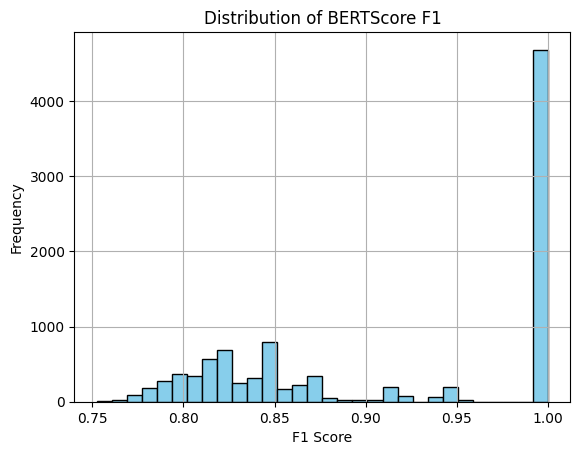

In [ ]:
plt.hist(F1.cpu().numpy(), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of BERTScore F1")
plt.xlabel("F1 Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

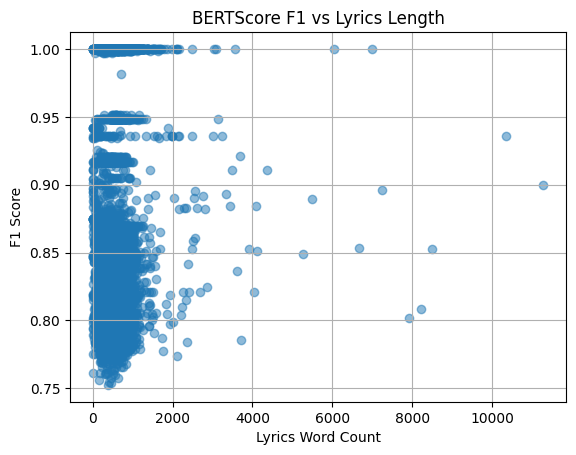

In [ ]:
lyrics_lengths = [len(l.split()) for l in lyrics]
plt.scatter(lyrics_lengths, F1.cpu().numpy(), alpha=0.5)
plt.title("BERTScore F1 vs Lyrics Length")
plt.xlabel("Lyrics Word Count")
plt.ylabel("F1 Score")
plt.grid(True)
plt.show()

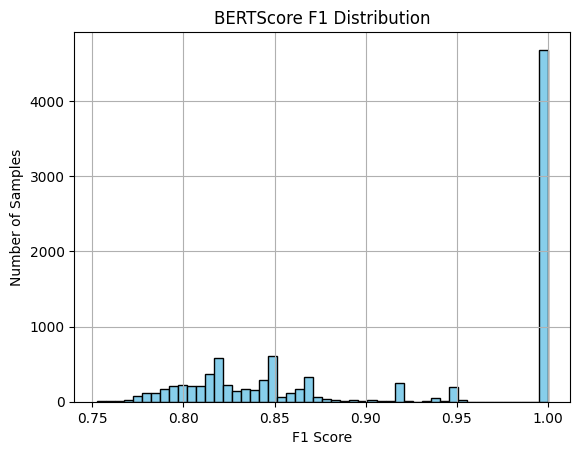

In [ ]:
plt.hist(F1.cpu().numpy(), bins=50, color='skyblue', edgecolor='black')
plt.title("BERTScore F1 Distribution")
plt.xlabel("F1 Score")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.show()

In [ ]:
results_df = pd.DataFrame({
    "Lyrics": lyrics,
    "Reference": references,
    "Prediction": predictions,
    "BERTScore_F1": F1.cpu().numpy()
})
print(results_df.sort_values("BERTScore_F1").head(10))

                                                 Lyrics  \
4051  \n\n[Intro: Big Sean]\nOh god!\nSean Don\nFall...   
9997  \n\n[Verse 1]\nI ponder of something great\nMy...   
9999  \n\n[Verse 1]\nWhen everyone you thought you k...   
2744  \n\n[Intro]\nVoices in your, voices in your, v...   
6675  \n\n[Intro: Camila Cabello & Travis Scott]\nYe...   
2882  \n\n[Intro: XXXTENTACION]\nSo what I mean is l...   
4203  \n\n[Intro: The Weeknd]\nYeah, uh\n\n[Verse 1:...   
4608  \n\n[Produced by: Tyler, The Creator]\n\n[Vers...   
4591  \n\n[Intro: Tyler, The Creator & Al Green]\nDr...   
9808  \n\n[Intro: Billie Eilish & Justin Bieber]\nHm...   

                                              Reference  Prediction  \
4051  Pop-Punk;Pop-Rock;Punk Rock;Alternative Pop;Al...         Pop   
9997  Rap Rock;Emo;Electronic Rock;Electro-Pop;Elect...        Rock   
9999  Nu Disco;Alternative Dance;Indie Pop;Indie;Syn...        Rock   
2744  Nu-Metal;Rap Rock;Metal;Screamo;Alternative;Ha...        Roc